In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
import xgboost as xgb 

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
df=pd.read_csv("Employee.csv")


In [17]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [19]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [20]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [21]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [22]:
df.shape

(4653, 9)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JoiningYear'>

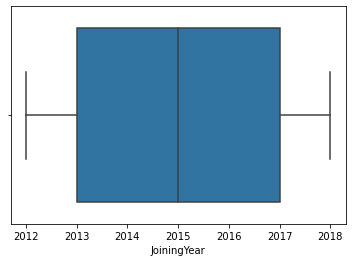

In [23]:
sns.boxplot(df['JoiningYear'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentTier'>

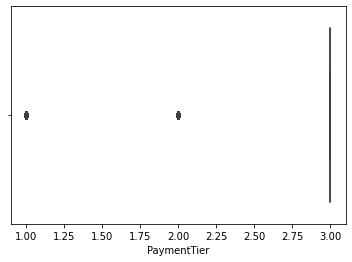

In [24]:
sns.boxplot(df['PaymentTier'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

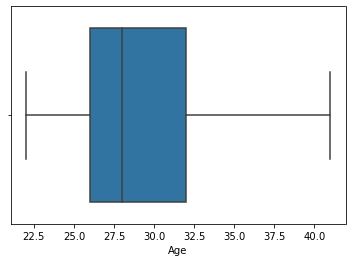

In [25]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceInCurrentDomain'>

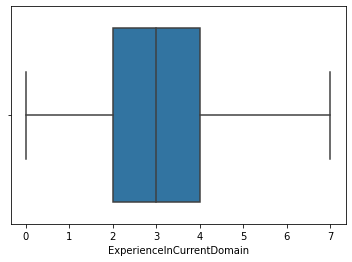

In [26]:
sns.boxplot(df['ExperienceInCurrentDomain'])

In [27]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<AxesSubplot:xlabel='Education', ylabel='count'>

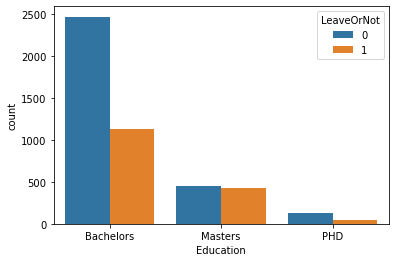

In [28]:
sns.countplot(x=df['Education'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='City', ylabel='count'>

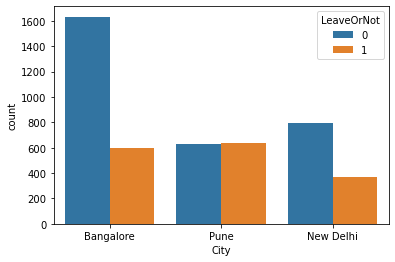

In [29]:
sns.countplot(x=df['City'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

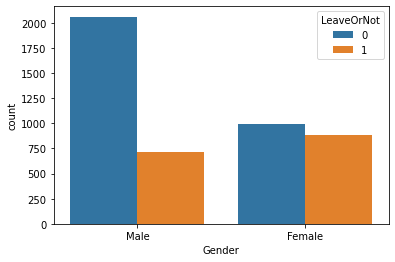

In [30]:
sns.countplot(x=df['Gender'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

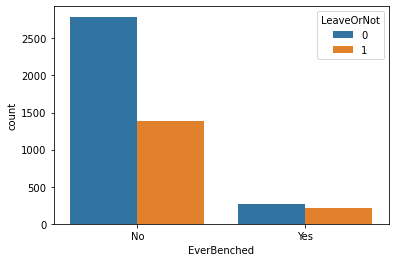

In [31]:

sns.countplot(x=df['EverBenched'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

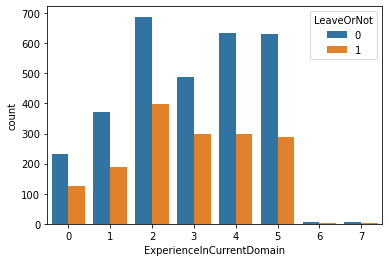

In [32]:
sns.countplot(x=df['ExperienceInCurrentDomain'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

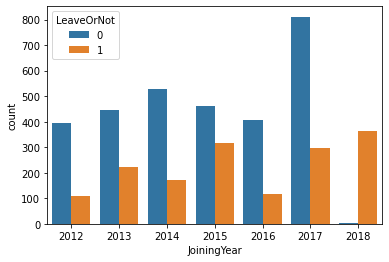

In [33]:
sns.countplot(x=df['JoiningYear'],hue=df['LeaveOrNot'])

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

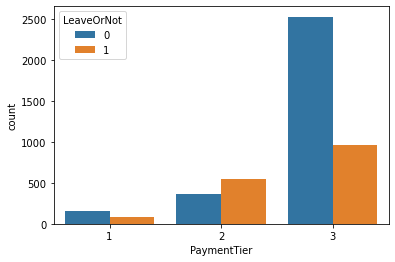

In [34]:

sns.countplot(x=df['PaymentTier'],hue=df['LeaveOrNot'])

In [35]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

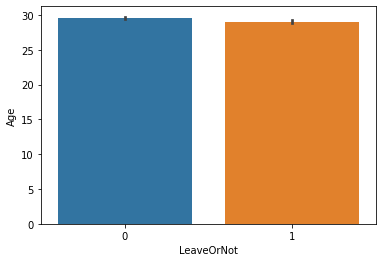

In [36]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

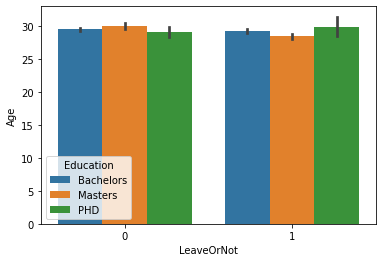

In [37]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['Education'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

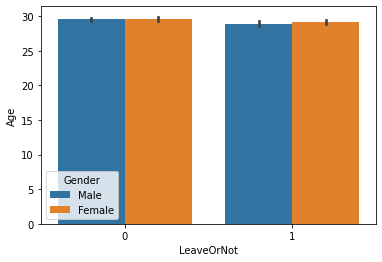

In [38]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

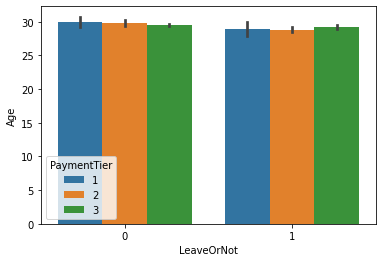

In [39]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['PaymentTier'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

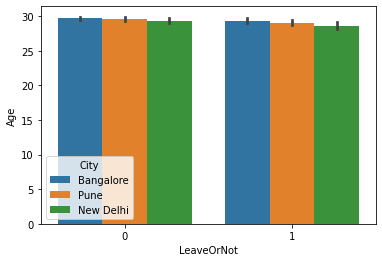

In [40]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['City'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

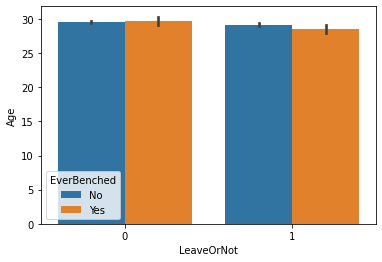

In [41]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['EverBenched'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

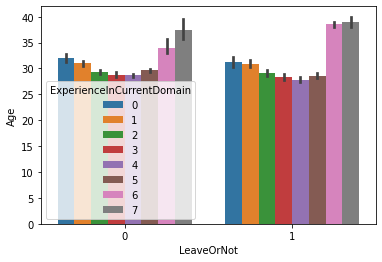

In [42]:
sns.barplot(x=df['LeaveOrNot'],y=df['Age'],hue=df['ExperienceInCurrentDomain'])

In [43]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

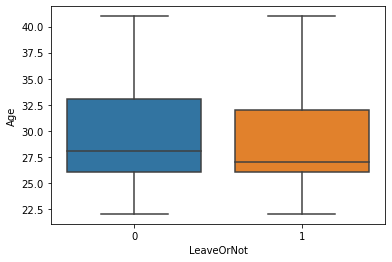

In [44]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

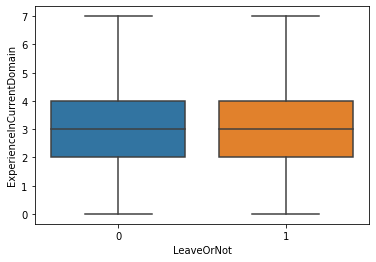

In [45]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

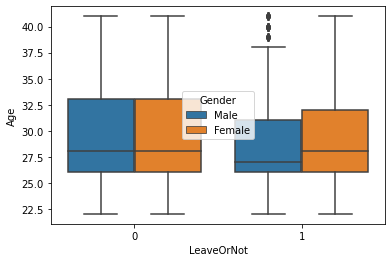

In [46]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['Gender'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

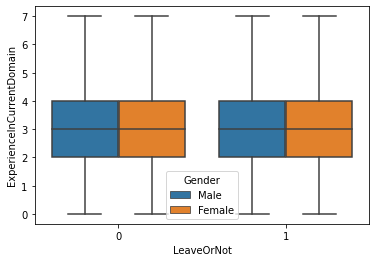

In [47]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['Gender'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

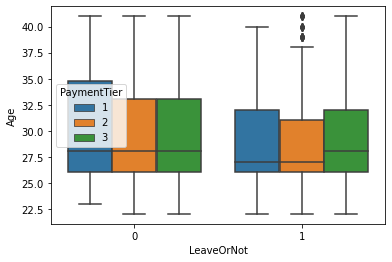

In [48]:

sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['PaymentTier'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

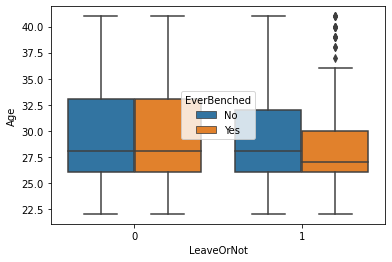

In [49]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['EverBenched'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

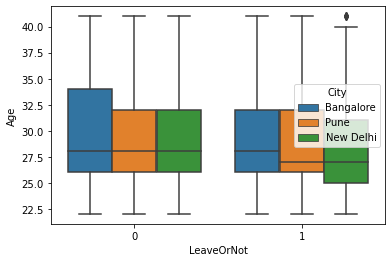

In [50]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['City'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

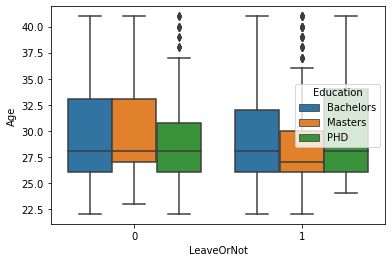

In [51]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['Education'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

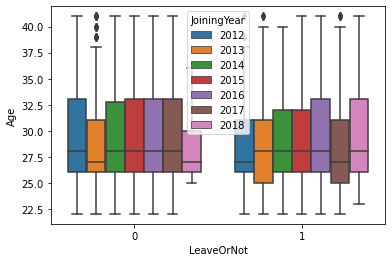

In [52]:
sns.boxplot(x=df['LeaveOrNot'],y=df["Age"],hue=df['JoiningYear'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

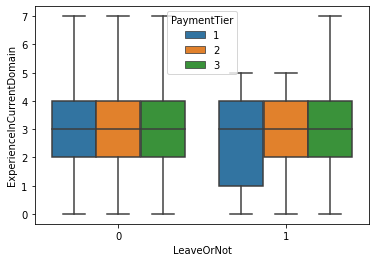

In [53]:

sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['PaymentTier'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

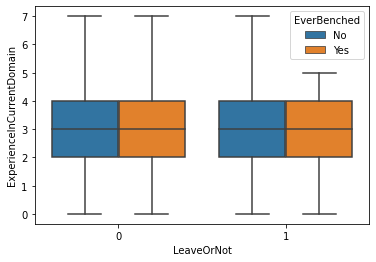

In [54]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['EverBenched'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

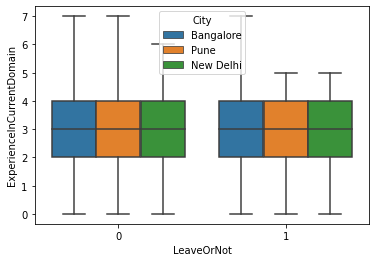

In [55]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['City'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

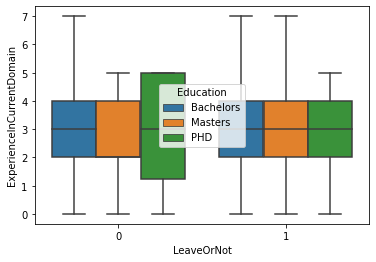

In [56]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['Education'])

<AxesSubplot:xlabel='LeaveOrNot', ylabel='ExperienceInCurrentDomain'>

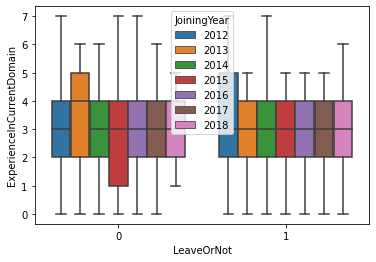

In [57]:
sns.boxplot(x=df['LeaveOrNot'],y=df["ExperienceInCurrentDomain"],hue=df['JoiningYear'])

In [58]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


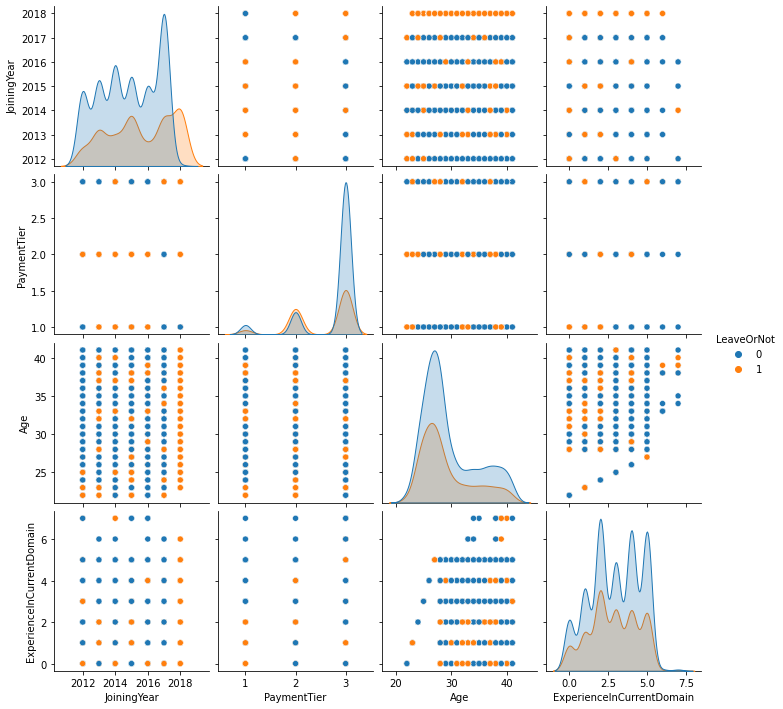

In [59]:
sns.pairplot(data=df,hue='LeaveOrNot')

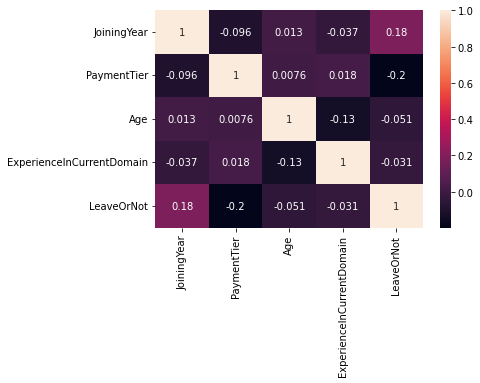

In [60]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [61]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

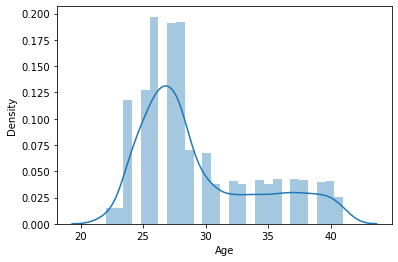

In [62]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

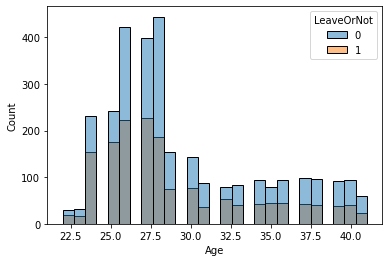

In [63]:
sns.histplot(data=df,x=df['Age'],hue="LeaveOrNot")

In [64]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [65]:
le=LabelEncoder()


In [66]:
df['Education']=le.fit_transform(df['Education'])


In [67]:
df['City']=le.fit_transform(df['City'])

In [68]:
df['Gender']=le.fit_transform(df['Gender'])

In [69]:
df['EverBenched']=le.fit_transform(df['EverBenched'])

In [70]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [71]:
y=df['LeaveOrNot']

In [72]:
X=df.drop('LeaveOrNot',axis=1)

In [73]:
sc=StandardScaler()

In [74]:
X=sc.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [76]:
X=df.drop('LeaveOrNot',axis=1)

In [77]:
y=df['LeaveOrNot']

In [78]:
sc=StandardScaler()

In [79]:
X=sc.fit_transform(X)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [81]:
X_train.shape

(3722, 8)

In [82]:
X_test.shape

(931, 8)

In [83]:
y_train.shape

(3722,)

In [84]:
y_test.shape

(931,)

# RandomForestClassifier

In [85]:
rfc=RandomForestClassifier()

In [86]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
y_pred=rfc.predict(X_train)


In [88]:
accuracy_score(y_train,y_pred)

0.9279957012358947

In [89]:
y_pred=rfc.predict(X_test)


In [90]:
accuracy_score(y_test,y_pred)

0.8528464017185822

In [91]:
KF=KFold(5)


In [92]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [93]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.839572192513369
1 0.8333333333333334
2 0.8440860215053764
3 0.8655913978494624
4 0.8602150537634409


In [94]:
scores.mean()

0.8485595997929964

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       610
           1       0.82      0.73      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



# LogisticRegression

In [96]:
lr=LogisticRegression()


In [97]:
lr.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_pred=lr.predict(X_train)


In [99]:
accuracy_score(y_train,y_pred)

0.707684040838259

In [100]:
y_pred=lr.predict(X_test)


In [101]:
accuracy_score(y_test,y_pred)

0.7110633727175081

In [102]:
KF=KFold(5)


In [103]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [104]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.6951871657754011
1 0.7204301075268817
2 0.7204301075268817
3 0.6881720430107527
4 0.6935483870967742


In [105]:
scores.mean()

0.7035535621873382

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       610
           1       0.63      0.39      0.48       321

    accuracy                           0.71       931
   macro avg       0.68      0.64      0.64       931
weighted avg       0.70      0.71      0.69       931



# KNeighborsClassifier

In [107]:
knc=KNeighborsClassifier()


In [108]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [109]:
y_pred=knc.predict(X_train)


In [110]:
accuracy_score(y_train,y_pred)

0.8608275120902741

In [111]:
y_pred=knc.predict(X_test)


In [112]:
accuracy_score(y_test,y_pred)

0.8281417830290011

In [113]:
KF=KFold(5)


In [114]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [115]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8181818181818182
1 0.7365591397849462
2 0.7849462365591398
3 0.8387096774193549
4 0.8010752688172043


In [116]:
scores.mean()

0.7958944281524927

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       610
           1       0.82      0.64      0.72       321

    accuracy                           0.83       931
   macro avg       0.83      0.78      0.80       931
weighted avg       0.83      0.83      0.82       931



# XGBClassifier

In [118]:
xgb_i=xgb.XGBClassifier()

In [119]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
y_pred=xgb_i.predict(X_train)


In [121]:
accuracy_score(y_train,y_pred)

0.8952176249328319

In [122]:
y_pred=xgb_i.predict(X_test)


In [123]:
accuracy_score(y_test,y_pred)

0.8603651987110634

In [124]:
KF=KFold(5)


In [125]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [126]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8342245989304813
1 0.8064516129032258
2 0.8548387096774194
3 0.8333333333333334
4 0.8225806451612904


In [127]:
scores.mean()

0.83028578000115

In [128]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       610
           1       0.86      0.72      0.78       321

    accuracy                           0.86       931
   macro avg       0.86      0.83      0.84       931
weighted avg       0.86      0.86      0.86       931



# DecisionTreeClassifier

In [129]:
dtc=DecisionTreeClassifier()


In [130]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
y_pred=dtc.predict(X_train)


In [132]:
accuracy_score(y_train,y_pred)

0.9279957012358947

In [133]:
y_pred=dtc.predict(X_test)


In [134]:
accuracy_score(y_test,y_pred)

0.8388829215896885

In [135]:
KF=KFold(5)


In [136]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [137]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8235294117647058
1 0.7849462365591398
2 0.8225806451612904
3 0.8440860215053764
4 0.8118279569892473


In [138]:
scores.mean()

0.8173940543959519

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       610
           1       0.79      0.73      0.76       321

    accuracy                           0.84       931
   macro avg       0.83      0.81      0.82       931
weighted avg       0.84      0.84      0.84       931



# Naive Bayes Classifier

In [140]:
model=GaussianNB()


In [141]:
model.fit(X_train,y_train)

GaussianNB()

In [142]:
y_pred=model.predict(X_train)


In [143]:
accuracy_score(y_train,y_pred)

0.6864588930682429

In [144]:
y_pred=model.predict(X_test)


In [145]:
accuracy_score(y_test,y_pred)

0.6852846401718582

In [146]:
KF=KFold(5)


In [147]:
scores=cross_val_score(model,X_test,y_test,cv=KF)


In [148]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7005347593582888
1 0.7043010752688172
2 0.6989247311827957
3 0.6720430107526881
4 0.7096774193548387


In [149]:
scores.mean()

0.6970961991834856

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       610
           1       0.55      0.45      0.50       321

    accuracy                           0.69       931
   macro avg       0.65      0.63      0.63       931
weighted avg       0.67      0.69      0.68       931



# ANN

In [151]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(8,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [152]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [153]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
117/117 [==============================] - 1s 3ms/step - loss: 0.6357 - accuracy: 0.6362
Epoch 2/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.7182
Epoch 3/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7453
Epoch 4/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7493
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7552
Epoch 6/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7681
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7759
Epoch 8/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7894
Epoch 9/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7945
Epoch 10/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8015

In [154]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8163


[0.44103488326072693, 0.8163265585899353]

In [155]:
y_pred=model.predict(X_test)

30/30 [==============================] - 0s 2ms/step


In [156]:
y_pred[:10]

array([[0.16466151],
       [0.10349549],
       [0.42935067],
       [0.5051108 ],
       [0.18642822],
       [0.30894047],
       [0.52932006],
       [0.9678977 ],
       [0.10784989],
       [0.9397679 ]], dtype=float32)

In [157]:
y_test[:10]

297     1
2705    0
501     1
1272    0
3956    0
322     1
1417    1
1034    1
1161    0
1094    1
Name: LeaveOrNot, dtype: int64

In [158]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [159]:
ypred[:10]

[0, 0, 0, 1, 0, 0, 1, 1, 0, 1]